In [1]:
pwd

'C:\\Users\\LENOVO\\MITx SC0 Supply Chain Analytics\\Module5_algorithms'

In [2]:
import numpy as np
import pandas as pd

<h1>PP1 - Dijkstra’s Algorithm</h1>

<img src="dikjstra.png">

Questions:

We showed how to set up an LP formulation to solve the shortest path problem last week, and this week we showed you Dijkstra's Algorithm to find the shortest path. Develop the shortest path tree from WA to all nodes in the network above, and answer the following questions. Assume the numbers on the arcs are distances in miles

What is the shortest path distance from node WA to node CH in the network shown above?

What is the shortest path distance from node WA to node CO in the network shown above?

What is the shortest path distance from node WA to node CI in the network shown above?

What is the shortest path distance from node WA to node NV in the network shown above?

What is the shortest path distance from node WA to node SL in the network shown above?

In [19]:
def initial_graph() :
    
    return {
            
        'SL': {'CH':300, 'IN':245, 'LV':263, 'NV':312},
        'CH': {'SL':300, 'IN':201, 'CL':362},
        'IN': {'SL':245, 'LV':114, 'CO':176, 'CH':201},
        'LV': {'SL':263, 'IN':114, 'LX':86, 'NV':175},
        'NV': {'SL':312, 'LV':175, 'KV':180},
        'CL': {'CH':362, 'CO':142, 'CN':251, 'MT':201, 'HB':332},
        'CO': {'CL':142, 'CI':105, 'IN':176},
        'CI': {'CO':105, 'IN':112, 'CN':204, 'LX':95},
        'LX': {'CI':95, 'CN':177, 'KV':170, 'LV':86},
        'KV': {'NV':180, 'GR':299, 'LX':170},
        'HB': {'CL':332, 'MT':213, 'WA':120},
        'MT': {'HB':213, 'WA':209, 'CN':157, 'CL':201},
        'CN': {'MT':157, 'RI':318, 'GR':244, 'LX':177, 'CI':204, 'CL':251},
        'GR': {'CN':244, 'RI':205, 'KV':299},
        'WA': {'HB':120, 'MT':209, 'RI':111},
        'RI': {'WA':111, 'CN':318, 'GR':205}
            
            
            
            }
print(initial_graph())

{'SL': {'CH': 300, 'IN': 245, 'LV': 263, 'NV': 312}, 'CH': {'SL': 300, 'IN': 201, 'CL': 362}, 'IN': {'SL': 245, 'LV': 114, 'CO': 176, 'CH': 201}, 'LV': {'SL': 263, 'IN': 114, 'LX': 86, 'NV': 175}, 'NV': {'SL': 312, 'LV': 175, 'KV': 180}, 'CL': {'CH': 362, 'CO': 142, 'CN': 251, 'MT': 201, 'HB': 332}, 'CO': {'CL': 142, 'CI': 105, 'IN': 176}, 'CI': {'CO': 105, 'IN': 112, 'CN': 204, 'LX': 95}, 'LX': {'CI': 95, 'CN': 177, 'KV': 170, 'LV': 86}, 'KV': {'NV': 180, 'GR': 299, 'LX': 170}, 'HB': {'CL': 332, 'MT': 213, 'WA': 120}, 'MT': {'HB': 213, 'WA': 209, 'CN': 157, 'CL': 201}, 'CN': {'MT': 157, 'RI': 318, 'GR': 244, 'LX': 177, 'CI': 204, 'CL': 251}, 'GR': {'CN': 244, 'RI': 205, 'KV': 299}, 'WA': {'HB': 120, 'MT': 209, 'RI': 111}, 'RI': {'WA': 111, 'CN': 318, 'GR': 205}}


In [20]:
initial = 'WA'
path = {}
adj_node = {}
queue = []
graph = initial_graph()
for node in graph:
    path[node] = float("inf")
    adj_node[node] = None
    queue.append(node)
    
path[initial] = 0
while queue:
    # find min distance which wasn't marked as current
    key_min = queue[0]
    min_val = path[key_min]
    for n in range(1, len(queue)):
        if path[queue[n]] < min_val:
            key_min = queue[n]  
            min_val = path[key_min]
    cur = key_min
    queue.remove(cur)
    print(cur)
    
    for i in graph[cur]:
        alternate = graph[cur][i] + path[cur]
        if path[i] > alternate:
            path[i] = alternate
            adj_node[i] = cur
            
            
x = 'SL' #terminal node
print('The path between initial to terminal')
print(x, end = '<-')
dist = 0
while True:
    x_prev = x
    x = adj_node[x_prev]
    if x is None:
        print("")
        print('distance is ', dist)
        break
    print(x, end='<-')
    dist += graph[x_prev][x]

WA
RI
HB
MT
GR
CN
CL
LX
CO
CI
KV
LV
IN
CH
NV
SL
The path between initial to terminal
SL<-LV<-LX<-CN<-MT<-WA<-
distance is  892


In [13]:
graph['CI']['CN']

204

In [12]:
adj_node

{'SL': 'LV',
 'CH': 'CL',
 'IN': 'CI',
 'LV': 'LX',
 'NV': 'KV',
 'CL': 'MT',
 'CO': 'CL',
 'CI': 'CN',
 'LX': 'CN',
 'KV': 'GR',
 'HB': 'WA',
 'MT': 'WA',
 'CN': 'MT',
 'GR': 'RI',
 'WA': None,
 'RI': 'WA'}

<h1>PP2 - Local routing</h1>

You are routing your vehicles to deliver goods to six customers. Your DC is located where the grey box is and the customers are located where the blue circles are. The customers are identified with an ID.

<img src="imgcw.png" width="300" height="400">

<img src="img2.png" width="600" height="300">

Questions:

We first start by calculating the distance savings when we pair customers into a tour loop.

What is the distance saving to travel from the DC to customer 1 and 6 and back to the DC versus delivering directly to each of them from the DC and back?

What is the distance saving to travel from the DC to customer 2 and 4 and back to the DC versus delivering directly to each of them from the DC and back?

Next, we rank the distance savings.

What is the greatest savings you can get from pairing two customers in one tour? (Do not consider vehicle capacity for now)

What is the smallest savings you can get from pairing two customers in one tour?

Consider that each van can only carry 50 boxes per tour.

How many vans do you need?

Please describe the tour including customer 1.
Please describe the tour including customer 2.
Please describe the tour including customer 3.
Please describe the tour including customer 4.
Please describe the tour including customer 5.
Please describe the tour including customer 6.

In [303]:
#code taken from https://github.com/lmarkely/scanalytics

class CWSA(object):
    '''
    argument:
    create an object with 'distances' attributes.
    self.distances[(from_node,to_node)] = distance
    output:
    '''
    def __init__(self):
        self.distances = {}

    def add_dist(self, from_node,to_node,distance):
        if from_node != 'DC' and to_node != 'DC':
            if from_node < to_node:
                self.distances[(from_node,to_node)] = distance
            else:
                self.distances[(to_node,from_node)] = distance
        elif from_node == 'DC':
            self.distances[(to_node,from_node)] = distance
        elif to_node == 'DC':
            self.distances[(from_node,to_node)] = distance

def CWSA_dist_matrix(cwsa):
    '''
    argument: cwsa object
    output:
    CWSA_mtx (numpy array): rows = from_node
                            columns = to_node
                            entries = distance (above diagonal element)
                                      diagonal and below diagonal elements are 0
    '''
    from_list = []
    dist_dict = cwsa.distances
    for from_node,to_node in dist_dict:
        if from_node not in from_list:
            from_list.append(from_node)
    from_list.sort()
    CWSA_mtx = np.zeros((len(from_list),len(from_list)+1))

    for from_node,to_node in dist_dict:
        if to_node != 'DC':
            CWSA_mtx[from_node-1,to_node-1] = dist_dict[(from_node,to_node)]
        else:
            CWSA_mtx[from_node-1,-1] = dist_dict[(from_node,to_node)]
    return CWSA_mtx

def CWSA_savings(cwsa):
    '''
    Given cwsa object, provide savings and distance table of
    argument:
    (object): cwsa object with complete distances attribute added by add_dist
              function
    output:
    CWSA_dict(dataframe): 1st column   = index
                          2nd column   = (from_node,to_node)
                          3rd column   = distance/cost saving for these nodes
    CWSA_mtx (dataframe): distance/cost (above diagonal element) and
                          saving (below diagonal element) of each pair of nodes
    '''
    CWSA_mtx = CWSA_dist_matrix(cwsa)
    CWSA_dict = {}
    for i in range(np.shape(CWSA_mtx)[0]):
        for j in range(i+1,np.shape(CWSA_mtx)[0]):
            saving = CWSA_mtx[i,-1] + CWSA_mtx[j,-1] - CWSA_mtx[i,j]
            CWSA_mtx[j,i] = saving
            CWSA_dict[(i+1,j+1)] = saving
    CWSA_list = sorted(CWSA_dict.items(),key=operator.itemgetter(1),
                       reverse=True)
    CWSA_savings_df = pd.DataFrame(CWSA_list)
    CWSA_df = pd.DataFrame(CWSA_mtx)
    return CWSA_df,CWSA_savings_df


In [304]:
from IPython.display import display
import operator
cwsa = CWSA()
cwsa.add_dist(1,2,16)
cwsa.add_dist(1,3,16.3)
cwsa.add_dist(1,4,20)
cwsa.add_dist(1,5,18.7)
cwsa.add_dist(1,6,17.9)
cwsa.add_dist(1,'DC',12.1)
cwsa.add_dist(2,3,6.5)
cwsa.add_dist(2,4,14.9)
cwsa.add_dist(2,5,15.8)
cwsa.add_dist(2,6,16.4)
cwsa.add_dist(2,'DC',10.6)
cwsa.add_dist(3,4,7.9)
cwsa.add_dist(3,5,9.8)
cwsa.add_dist(3,6,10.4)
cwsa.add_dist(3,'DC',9.4)
cwsa.add_dist(4,5,6.4)
cwsa.add_dist(4,6,13.4)
cwsa.add_dist(4,'DC',17.2)
cwsa.add_dist(5,6,12.1)
cwsa.add_dist(5,'DC',15.4)
cwsa.add_dist(6,'DC',16.7)

CWSA_df, CWSA_savings_df = CWSA_savings(cwsa)
display(CWSA_df)
display(CWSA_savings_df)

,0,1,2,3,4,5,6
0,0.0,16.0,16.3,20.0,18.7,17.9,12.1
1,6.7,0.0,6.5,14.9,15.8,16.4,10.6
2,5.2,13.5,0.0,7.9,9.8,10.4,9.4
3,9.3,12.9,18.7,0.0,6.4,13.4,17.2
4,8.8,10.2,15.0,26.2,0.0,12.1,15.4
5,10.9,10.9,15.7,20.5,20.0,0.0,16.7


,0,1
0,"(4, 5)",26.2
1,"(4, 6)",20.5
2,"(5, 6)",20.0
3,"(3, 4)",18.7
4,"(3, 6)",15.7
5,"(3, 5)",15.0
6,"(2, 3)",13.5
7,"(2, 4)",12.9
8,"(1, 6)",10.9
9,"(2, 6)",10.9


In [68]:
from scipy import stats
import matplotlib.pyplot as plt

In [29]:
sushi = pd.read_csv('sushidemand.csv', header = 0)

In [31]:
sushi.Demand.describe()

count    60.000000
mean     19.766667
std       4.907161
min       7.000000
25%      17.000000
50%      20.000000
75%      24.000000
max      31.000000
Name: Demand, dtype: float64

In [59]:
#Using the 60 day sample of demand for Suzie's Sushi Shack, conduct a ChiSquare Test to evaluate 
#whether it is distributed following a discrete uniform 
#distribution with a minimum of 5 and a maximum of 40. Conduct the test for demand ranging from 5 to 40.

#What is the p-value for the Chi Square test?
#Enter your answer in decimal form using three decimal places. For example, if your answer is 23.24%, 
#you should enter .232 in the box below. If your answer is less than .001, you may enter "0" in the box below.

obs_val = np.array(sushi.Demand)
exp_val = np.linspace(5,40,60,endpoint = True)
stats.chisquare(obs_val, exp_val)

Power_divergenceResult(statistic=638.1390327421644, pvalue=4.1459396537430496e-98)

In [60]:
#since the p value is 0, we reject H0 that the demand distribution is a uniform distribution between 5 and 40

In [85]:
model = stats.norm(800,20.9/np.sqrt(40))

In [86]:
model.ppf(1-0.01/2)

808.5120343988557

In [129]:
saleprice = 80
cost = 25
demandmean = 20
demandstd = 5
prodq = 30

prodqs = range(15,41,1)

profits={}
for i in prodqs:
    randomdemand = np.round(np.random.normal(demandmean, demandstd, 100000))
    extraquantity = prodq - randomdemand
    revenue = np.minimum(randomdemand, i) * 80
    totalcost = i*cost
    profit = revenue - totalcost
    profits[i] = np.mean(profit)

In [105]:
#sim = pd.DataFrame({'demand':randomdemand, 'extraquantity': extraquantity, 'revenue': revenue, \
#                    'totalcost':np.full(1000,totalcost),'profit': profit})

In [131]:
#what is the optimal production quantity?
profits

{15: 791.7992,
 16: 831.9592,
 17: 867.7896,
 18: 897.3896,
 19: 922.904,
 20: 940.3712,
 21: 953.3296,
 22: 957.5312,
 23: 957.22,
 24: 950.496,
 25: 942.4296,
 26: 926.8664,
 27: 910.9168,
 28: 888.6552,
 29: 868.7312,
 30: 848.2224,
 31: 823.0744,
 32: 798.7704,
 33: 774.4344,
 34: 750.3648,
 35: 726.0424,
 36: 700.208,
 37: 674.0584,
 38: 651.7312,
 39: 627.3736,
 40: 600.4808}

In [237]:
#As a small restaurant owner, you are very interested in understanding the demand of your different products. 
#You have been collecting data over the past 11 weeks on the number of fish platter sales that you make each day.

#You want to run a simulation and you believe that 60% of your fish platter sales for a given week show up on 
#the weekends (evenly split between Friday, Saturday and Sunday) while the remaining 40% are evenly divided across 
#the four other weekdays (Monday, Tuesday, Wednesday and Thursday).

#Your recorded data over the past 11 weeks is below. Use the average demand for each day (Monday to Sunday) to 
#test your assumption about the daily distribution of fish platter sales.

fish = pd.read_csv('fishsales.csv')

In [238]:
fish = fish.dropna(how="any")
fish.tail()

,Day,FishPlatterSales
72,Wednesday,10.0
73,Thursday,10.0
74,Friday,11.0
75,Saturday,15.0
76,Sunday,9.0


In [239]:
#Use a Chi-Squared test to see if your assumed distribution is correct.

fish['FishPlatterSales'].describe()

count    77.000000
mean     13.740260
std       3.388846
min       9.000000
25%      10.000000
50%      13.000000
75%      17.000000
max      19.000000
Name: FishPlatterSales, dtype: float64

In [240]:
fish['Week'] = np.zeros((len(fish),1))
fish['Daynum'] = np.zeros((len(fish),1))
for i in range(len(fish)):
    fish['Week'][i] = i//7 + 1
    fish['Daynum'][i] = i % 7 + 1

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [255]:
weekavg = fish.groupby('Daynum')['FishPlatterSales'].mean()
print(weekavg)

Daynum
1.0    13.090909
2.0    14.090909
3.0    13.818182
4.0    13.272727
5.0    13.363636
6.0    14.909091
7.0    13.636364
Name: FishPlatterSales, dtype: float64


In [256]:
exp_val = np.zeros((len(weekavg)))

In [257]:
obs_val = np.array(weekavg)
print(obs_val)

[13.09090909 14.09090909 13.81818182 13.27272727 13.36363636 14.90909091
 13.63636364]


In [258]:
for i in range(len(weekavg)):
    if i <= 3:
        exp_val[i] = (0.4/4) * np.sum(obs_val)
    else:
        exp_val[i] = (0.6/3) * np.sum(obs_val)
        
            
print(exp_val)

[ 9.61818182  9.61818182  9.61818182  9.61818182 19.23636364 19.23636364
 19.23636364]


In [260]:
#What is the P-Value of your Chi-Squared test?

#Suppose that the owner wants to test if his initial hypothesis is accurate at 
#95% confidence interval. You set up the below Hypothesis test

#H0:  The actual sales distribution resembles the expected distribution at the 95% confidence level

#H1:  The actual sales distribution doesnot resemble the expected distribution at the 95% confidence level

#alpha = 0.05/2 , reject H0 if p value is less than alpha


stats.chisquare(obs_val, f_exp = exp_val)

Power_divergenceResult(statistic=10.952998797044161, pvalue=0.08983996873059105)

<h1>Part 2</h1>

You have opened a Shrimp Shack next to Suzie’s Shrimp Shack and are trying to understand what your daily sales would be for shrimp.

Unfortunately, the fisherman who provide you your shrimp are not consistent. You modeled the amount of shrimp they can provide for you each day is uniformly distributed between 500 and 1200 pounds. The demand for shrimp, from your past records, appears to be normally distributed with a mean of 900 pounds and a standard deviation of 200 pounds.

You only sell the shrimp that were caught that day. That is, you cannot carry any inventory from one day to another. Also, you cannot sell shrimp that were not delivered to you by the fisherman each day.

You decide to run 200 simulations of 1000 days each.

<b>What is your expected sales each day under this simulation?

Use the expected sales from each of your 200 simulations to create a confidence interval for the mean of those expected sales. What is the 98% confidence interval, L (Your confidence interval is mean +/- L), for this estimate?</b>

In [294]:
daily_sales = []
for i in range(200):

    demand = np.round(np.random.normal(900,200,(1000,1)))
    supply = np.random.randint(500,1201,(1000,1))

    extrasupply = np.maximum(supply-demand,0)
    sales = supply - extrasupply
    daily_sales.append(np.mean(sales))

print('Expected Sales after 200 simulations: ', np.mean(daily_sales))

Expected Sales after 200 simulations:  757.630755


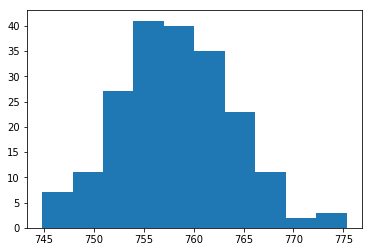

In [274]:
plt.hist(daily_sales);

In [275]:
np.std(daily_sales)

5.760401918086965

In [301]:
distribution = stats.norm(np.mean(daily_sales),np.std(daily_sales)/np.sqrt(200))
print('Confidence Interval of 98% : ' ,distribution.ppf(0.99) - np.mean(daily_sales))

Confidence Interval of 98% :  0.9073435576536895


In [302]:
#The L value of a confidence interval is given as:
#L=ConfidenceLevel∗StandardDeviationn/squareroot of sample
#confidence level is simply the 2 tailed z value with alpha of 0.02 
stats.norm.ppf(0.99)*np.std(daily_sales)/np.sqrt(200)

0.907343557653642

<h1>Problem 1 - Local routing II</h1>

You are routing your vehicles to deliver goods to seven customers. The customers are identified with an ID.

These are the distances between the customer locations and the distribution centers in miles.

<img src="moduletest.png">

Consider that each of your trucks can carry, at most, 100 boxes per tour. Use the Savings algorithm to design the routes.

Tip: Remember that the Savings algorithm is a heuristic algorithm. This means that the solution provided by the Savings algorithm will not necessarily be the optimal solution to the problem.

Important: Write the sequence of customers with a dash between the ID numbers (do not use spaces and do not include “DC”). For example, if the route goes from DC to 5 to 2 to 6 to DC, write 5-2-6 or 6-2-5 (both are considered correct). In the above example, 2-5-6 or 2-6-5 would be considered wrong!

How many tours do you need?

In [310]:
cwsa2 = CWSA()
cwsa2.add_dist(1,2,16.3)
cwsa2.add_dist(1,3,16.5)
cwsa2.add_dist(1,4,20)
cwsa2.add_dist(1,5,19.6)
cwsa2.add_dist(1,6,17.9)
cwsa2.add_dist(1,7,9.3)
cwsa2.add_dist(1,'DC',12.7)
cwsa2.add_dist(2,3,7.2)
cwsa2.add_dist(2,4,14.9)
cwsa2.add_dist(2,5,16.6)
cwsa2.add_dist(2,6,16.6)
cwsa2.add_dist(2,7,12.7)
cwsa2.add_dist(2,'DC',11.5)
cwsa2.add_dist(3,4,8.9)
cwsa2.add_dist(3,5,10.1)
cwsa2.add_dist(3,6,11)
cwsa2.add_dist(3,7,10.8)
cwsa2.add_dist(3,'DC',9.8)
cwsa2.add_dist(4,5,7.3)
cwsa2.add_dist(4,6,13.4)
cwsa2.add_dist(4,7,19.1)
cwsa2.add_dist(4,'DC',17.5)
cwsa2.add_dist(5,6,12.9)
cwsa2.add_dist(5,6,16.4)
cwsa2.add_dist(5,'DC',16.1)
cwsa2.add_dist(6,7,9.4)
cwsa2.add_dist(6,'DC',17.4)
cwsa2.add_dist(7,'DC',3.6)

CWSA_df2, CWSA_savings_df2 = CWSA_savings(cwsa2)
display(CWSA_df2)
display(CWSA_savings_df2)

,0,1,2,3,4,5,6,7
0,0.0,16.3,16.5,20.0,19.6,17.9,9.3,12.7
1,7.9,0.0,7.2,14.9,16.6,16.6,12.7,11.5
2,6.0,14.1,0.0,8.9,10.1,11.0,10.8,9.8
3,10.2,14.1,18.4,0.0,7.3,13.4,19.1,17.5
4,9.2,11.0,15.8,26.3,0.0,16.4,0.0,16.1
5,12.2,12.3,16.2,21.5,17.1,0.0,9.4,17.4
6,7.0,2.4,2.6,2.0,19.7,11.6,0.0,3.6


,0,1
0,"(4, 5)",26.3
1,"(4, 6)",21.5
2,"(5, 7)",19.7
3,"(3, 4)",18.4
4,"(5, 6)",17.1
5,"(3, 6)",16.2
6,"(3, 5)",15.8
7,"(2, 3)",14.1
8,"(2, 4)",14.1
9,"(2, 6)",12.3


Solution:

We look down the rank of savings to identify customers that can be paired. We only pair the customers in a loop if the sum of the demand does not exceed 100. First we pair customers 4 and 5. Then we pair 4 and 6. This makes a sequence 5-4-6. We cannot pair customers 3 and 4 because customer 4 is linked to customers 5 and 6, but customer 3 can be paired with customer 6. So we pair 3 to 6, and the first truck is full with 100 boxes. The first tour is DC-3-6-4-5-DC OR DC-5-4-6-3-DC.

We continue to move down the table, and find that we can pair customers 1 and 2, making tour DC-1-2-DC or DC-2-1-DC. Next we pair 1 and 7, so the tour is either DC-7-1-2-DC or DC-2-1-7-DC. The second truck carries 72 boxes.

<img src="solutionmoduletest.png">


<h1>Daily Top Chef</h1>

You have been moved into the transportation department for Daily Top Chef. They distribute their food from each kitchen to their assigned regions using a hub and spoke network. Each night, one large truck hauls all of the pouches for a single region to a parking lot in the middle of that region. The pouches are then transferred from the large truck to several vans in the parking lot. These vans then deliver the pouches to the customers in the early morning hours. This is sometimes called "pooled" operations, where a larger capacity vehicle brings in a large quantity of items that are "cross-docked" into smaller local vehicles for final delivery.

You are trying to understand the cost of delivering to the Oklahoma City region north of your kitchen in Dallas, Texas. You understand the following:

Each evening one truck leaves the kitchen in Dallas and drives to the parking lot (the pool point) in the center of the Oklahoma City region with all of the pouches for that entire region.
The truck has a capacity to hold 500 pouches of food and truck transportation cost is $675 (the transportation cost includes loading and unloading costs of the truck).
In Oklahoma City, there is a fleet of vans that perform the local delivery.
The capacity of each van is 50 pouches.
The cost to load each van at the pool point is $10.
The cost to stop at a customer location is $2 per stop.
The cost to unload and deliver a single pouch at a destination is $0.50 per pouch.
The cost for driving the local vans is $2.25 per mile.
Your daily demand for food pouches is 325 pouches and each customer only gets one pouch.
The Oklahoma City Region is estimated to be essentially a square of 20 by 20 miles with the pool point exactly in the middle.

<b>What is the total daily transportation cost per pouch for the Oklahoma City region? Include all costs from leaving the kitchen to delivery to the customer. Enter your answer in dollars rounded to the second decimal. Do NOT include the $ symbol in your answer.</b>

Formula for total cost minus truck haul cost:

<img src = "equation.png" width = "700" height = "500">

<h1>Problem 3 - Lobster Jack</h1>

The restaurant owner Lobster Jack wants to find out what the peak demand periods are, during the hours of operation, in order to be better prepared to serve his customers. He thinks that, on average, 60% of the daily customers come between 6:00pm and 8:59pm (equally distributed in that time) and the remaining 40% of customers come at other times during the operating hours (again equally distributed). He wants to verify if that is true or not, so he asked his staff to write down during one week the number of customers that come into the restaurant at a given hour each day. His staff gave him the following data: (see lobster_raw_data below)

Help the manager figure out if his instincts are correct or not. Use a Chi-Squared test to see if the observed distribution is similar to the expected. Use the average demand for a given time as your observed value.

In [319]:
lobster_raw_data = pd.read_csv("lobstersales.csv", index_col = 0)

In [320]:
lobster_raw_data

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
Time,,,,,,,
5:00pm-5:59pm,15,19,21,20,12,15,15
6:00pm-6:59pm,30,23,24,25,28,29,26
7:00pm-7:59pm,36,29,39,35,39,30,32
8:00pm-8:59pm,29,33,23,29,24,32,27
9:00pm-9:59pm,21,20,12,19,18,14,20
10:00pm-10:59pm,12,12,15,12,10,15,14
11:00pm-11:59pm,8,7,9,10,12,12,9


In [328]:
avg_sales = lobster_raw_data.mean(axis = 1)
print(avg_sales)

Time
5:00pm-5:59pm      16.714286
6:00pm-6:59pm      26.428571
7:00pm-7:59pm      34.285714
8:00pm-8:59pm      28.142857
9:00pm-9:59pm      17.714286
10:00pm-10:59pm    12.857143
11:00pm-11:59pm     9.571429
dtype: float64


In [325]:
exp_sales = []

for i in range(len(avg_sales)):
    if i > 0 and i <4:
        exp_sales.append((0.6/3)*np.sum(avg_sales))
    else:
        exp_sales.append((0.4/4)*np.sum(avg_sales))
        
print(exp_sales)

[14.571428571428573, 29.142857142857142, 29.142857142857142, 29.142857142857142, 14.571428571428573, 14.571428571428573, 14.571428571428573]


In [326]:
obs_val = np.array(avg_sales)
exp_val = np.array(exp_sales)

In [336]:
stat, pval = stats.chisquare(obs_val, exp_val)

In [343]:
alpha = 0.2

print("pvalue = ", pval )

pvalue =  0.6624637500133668


With the chi-squared value you can identify the corresponding p-value which is = 0.6625.

The p-value is greater than what is required for a confidence level of 80% (alpha=0.20). Therefore we cannot reject the null hypothesis.

<h1>Part 2</h1>

The owner now wants you to help him analyze his sales data. The restaurant is famous for its Lobo lobster roll. You were given some information based on which you deduced that the demand for the lobster roll was normally distributed with a mean of 220 and standard deviation of 50. You also know that the lobster supplier can provide lobster at a rate that mimics a uniform distribution between 170 and 300. One Lobster is used per roll and the lobsters need to be fresh (i.e. the restaurant can only use the lobsters that are delivered that day).

You decide to run 200 simulations of 1000 days each.

Calculate the expected sales of Lobster roll per day based on your simulation results.

In [368]:
sim = 200
sim_sales = []

for i in range(sim):

    lobs_demand = np.round(np.random.normal(220,50, (1000,1)))
    lobs_supply = np.random.randint(170,301,(1000,1))

    extra_supply = np.maximum((lobs_supply - lobs_demand), 0)
    sales = lobs_supply - extra_supply
    sim_sales.append(np.mean(sales))

print("Expected value after 200 simulations: ", np.mean(sim_sales))

Expected value after 200 simulations:  201.59243000000004


In [367]:
#Use the expected sales from each of your 200 simulations to create a confidence interval 
#for the average expected sales. What is the 95% confidence interval, 
#L (Your confidence interval is mean +/- L), for this estimate?

distribution = stats.norm(np.mean(sim_sales),np.std(sim_sales)/np.sqrt(sim))
print('Confidence Interval of 95% : ' ,distribution.ppf(0.975) - np.mean(sim_sales))

Confidence Interval of 95% :  0.16919187669168423


Once you have your overall simulation set up, you should use the standard deviation of your 200 expected values (one from each 1000 day simulation) to calculate your standard error term for the mean. You would then use a two tailed Z-distribution with an alpha of .05 to generate your Z-value. Multiplying your Z-value by your standard error should give you an L value close to .18. Please note that your answer may vary depending upon the random numbers generated in your simulation